In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='3'
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation

Data import for scikit learn models and transform to TensorFlow dataset for neural network model.

In [17]:
def df_to_dataset(dataframe, shuffle=False, batch_size=256):
  """
  Create TensorFlow dataset from Pandas data frame.
  Label column name should be 'target'
  """
  df = dataframe
  #df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value.to_numpy()[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [18]:
data = pd.read_csv('../Data/LT_DU_data_for_ML.csv')
data.head()

,nace,esize_class,gender,age_class,lpk,education,experience,target
0,C,1_49,M,40-49,p721,G2,13,8.20
1,C,1_49,F,40-49,p334,G2,0,2.51
2,M,50_249,F,40-49,p522,G2,18,2.19
3,M,50_249,F,40-49,p522,G2,12,2.19
4,M,50_249,F,14-29,p522,G2,0,2.19


In [19]:
data_tf = df_to_dataset(data.copy(),  shuffle=False, batch_size=256)
data_tf

<PrefetchDataset element_spec=({'nace': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'esize_class': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'gender': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'age_class': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'lpk': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'education': TensorSpec(shape=(None, 1), dtype=tf.string, name=None), 'experience': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

# Import models and predict

In [20]:
import joblib
xgb_model = joblib.load('./Models/XGBoost_model.joblib')
grb_model = joblib.load('./Models/GRBoost_model.joblib')
lm_model = joblib.load('./Models/LM_model.joblib')
rf_model = joblib.load('./Models/RF_model.joblib')
svr_model = joblib.load('./Models/SVR_model.joblib')
sk_voting_model = joblib.load('./Models/SklearnVoting_model.joblib')
tf_model = tf.keras.models.load_model("./Models/tf_model")

In [21]:
data_ml = data.copy()

data_ml['xgb'] = xgb_model.predict(data)
data_ml['grb'] = grb_model.predict(data)
data_ml['rf'] = rf_model.predict(data)
data_ml['lm'] = lm_model.predict(data)
data_ml['svr'] = svr_model.predict(data)
data_ml['voting'] = sk_voting_model.predict(data)

data_ml['tf'] = tf_model.predict(data_tf)

data_ml.head()

128/128 [==============================] - 0s 1ms/step


,nace,esize_class,gender,age_class,lpk,education,experience,target,xgb,grb,rf,lm,svr,voting,tf
0,C,1_49,M,40-49,p721,G2,13,8.20,4.503678,4.176350,4.778167,4.061958,4.009178,4.390707,4.049001
1,C,1_49,F,40-49,p334,G2,0,2.51,3.051344,2.980969,3.041897,2.992907,3.122998,3.266770,3.292751
2,M,50_249,F,40-49,p522,G2,18,2.19,3.425669,3.172908,3.256087,3.945913,2.907824,3.278419,3.245212
3,M,50_249,F,40-49,p522,G2,12,2.19,3.298834,3.066702,3.219982,3.849712,2.802480,3.200731,3.176937
4,M,50_249,F,14-29,p522,G2,0,2.19,2.991804,2.920913,2.993366,3.531646,2.741929,3.123216,2.880577


In [24]:
target_columns = ['target', 'xgb', 'grb', 'rf', 'lm', 'svr', 'voting', 'tf']

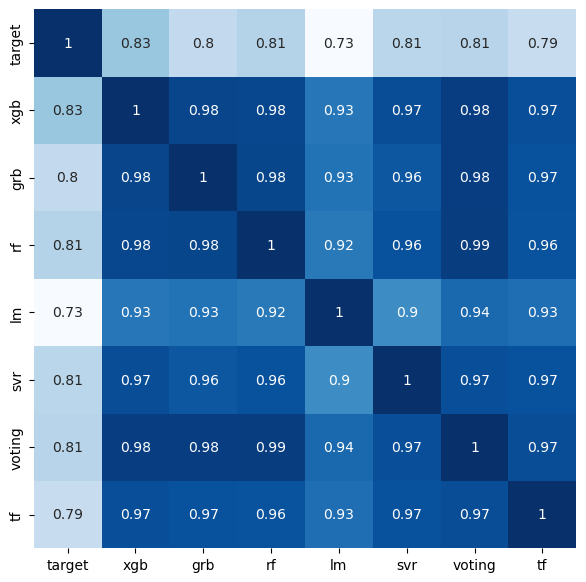

In [25]:
plt.figure(figsize = (7, 7))
sns.heatmap(data_ml[target_columns].corr(), annot=True, cmap='Blues', cbar=False);

In [26]:
data_ml.to_csv('../Data/LT_DU_ML_results.csv', index=False)